In [99]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [101]:
president = pd.read_csv('./oakland-president.txt')
straight_party = pd.read_csv('./oakland-straight-party.txt')

In [102]:

straight_party['percentage_republican'] = straight_party['rep'] / straight_party['sp_total']

In [103]:

#president['trump_vote_percentage'] = president['trump'] / (president['total_votes'])
president['trump_vote_percentage'] = (president['trump'] - straight_party['rep']) / (president['total_votes'] - straight_party['sp_total'])

president['voter_turnout_percentage'] = president['total_votes']/president['reg']
president['biden_vote_percentage'] = president['biden'] / (president['total_votes'])

In [104]:
straight_republican_percentage = straight_party['percentage_republican'].tolist()
trump_relative_performance = (president['trump_vote_percentage'] - straight_party['percentage_republican']).tolist()

voter_turnout_percentage = president['voter_turnout_percentage'].tolist()
biden_vote_percentage = president['biden_vote_percentage'].tolist()

slope_points_x = []
slope_points_y = []

for index, value in enumerate(straight_republican_percentage):
    if value < 0.2:
        slope_points_x.append(value)
        slope_points_y.append(trump_relative_performance[index])  

m, b = np.polyfit(slope_points_x, slope_points_y, 1)
x = np.array(slope_points_x)

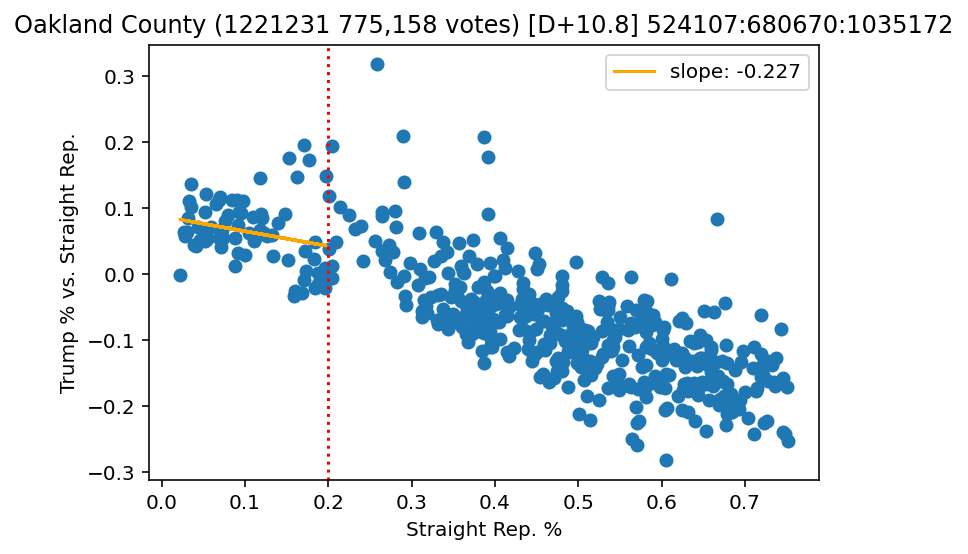

No handles with labels found to put in legend.


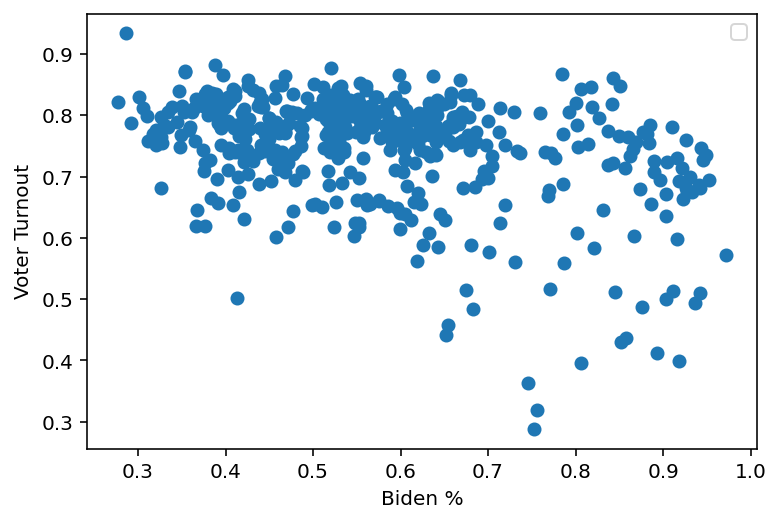

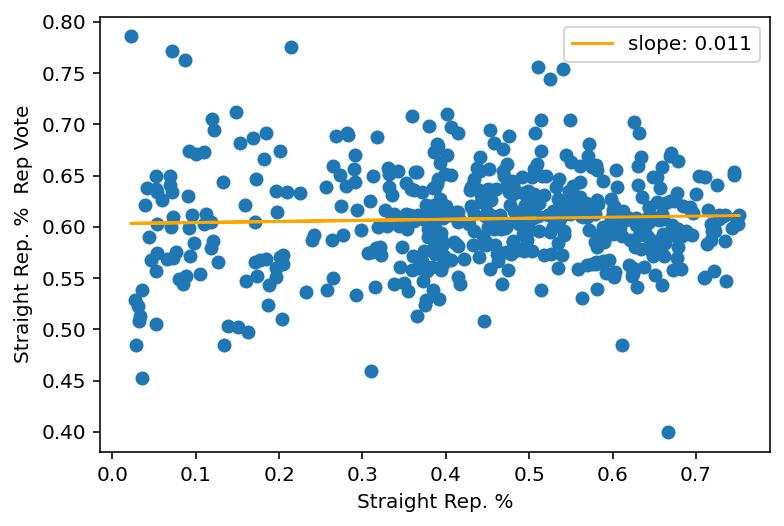

In [105]:
plt.scatter(
    straight_republican_percentage,
    trump_relative_performance
)

plt.xlabel('Straight Rep. %')
plt.ylabel('Trump % vs. Straight Rep.')
plt.axvline(x=0.2, color='red', linestyle='dotted')

plt.plot(x, m*x + b, color='orange', label=f'slope: {round(m, 3)}')
plt.legend(loc=0)
total_votes = president['total_votes'].sum() + straight_party['sp_total'].sum()
trump_votes = president['trump'].sum() + straight_party['rep'].sum()
biden_votes = president['biden'].sum() + straight_party['dem'].sum()
plt.title('Oakland County (' + str(total_votes) + ' 775,158 votes) [D+10.8] ' + str(trump_votes) + ':' + str(biden_votes) + ':' + str(straight_party['reg'].sum()))

plt.show()

# shows voter turnout in biden favored areas was better

plt.scatter(
 biden_vote_percentage,
 voter_turnout_percentage
)

plt.xlabel('Biden %')
plt.ylabel('Voter Turnout')

slope_points_x = []
slope_points_y = []

for index, value in enumerate(biden_vote_percentage):
        slope_points_x.append(value)
        slope_points_y.append(voter_turnout_percentage[index])  

m, b = np.polyfit(slope_points_x, slope_points_y, 1)
x = np.array(slope_points_x)
plt.legend(loc=0)
plt.show()






# shows straight/federal rep voting is flat

#straight_republican_vote_percentage = (straight_party['rep'] / (president['trump'] + straight_party['rep'])).tolist()
straight_republican_vote_percentage = (straight_party['rep'] / (president['trump'])).tolist()

plt.scatter(
 straight_republican_percentage,
 straight_republican_vote_percentage
)

plt.xlabel('Straight Rep. %')
plt.ylabel('Straight Rep. %  Rep Vote')

slope_points_x = []
slope_points_y = []

for index, value in enumerate(straight_republican_percentage):
        slope_points_x.append(value)
        slope_points_y.append(straight_republican_vote_percentage[index])  

m, b = np.polyfit(slope_points_x, slope_points_y, 1)
x = np.array(slope_points_x)
plt.plot(x, m*x + b, color='orange', label=f'slope: {round(m, 3)}')
plt.legend(loc=0)
plt.show()